# Plot LAT SAA polygon on a map

### Robert Cameron, May 2017

In [1]:
from ipywidgets import *
from IPython.display import *
%matplotlib notebook
from datetime import *
import re
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt, mpld3
from astropy.table import Table, Column

In [2]:
# data file directory: 
path = "/Users/rac/Documents/GLAST/ISOC/LATmetrics/saa/polygon/"

In [3]:
# read ASCII file of **LAT** SAA polygon vertex coordinates
file = "history.new.poly"
# header line, then per line: Y-M-D h:m:s unix-seconds [12-latitude-values] [12-longitude-values]
t1 = Table.read(path+file, format='ascii')
c1=list(t1[-1])
h1lat = c1[3:3+12]
h1lon = c1[3+12:]

In [5]:
# read ASCII file of **GBM** SAA polygon vertex coordinates
file = "history2.poly"
# header line, then per line: Y-M-D h:m:s unix-seconds [12-lat-values] [12-long-values]
t2 = Table.read(path+file, format='ascii')
c2=list(t2[-1])
h2lat = c2[3:3+12]
h2lon = c2[3+12:]

In [7]:
# define the LAT SAA region
saallon = [ 33.9,  24.5, -18.6, -25.7, -36.0, -42.0, -58.8, -93.1, -97.5, -98.5, -92.1, -86.1,  33.9]
saallat = [-30.0, -22.6,   2.5,   5.2,   5.2,   4.6,   0.7,  -8.6,  -9.9, -12.5, -21.7, -30.0, -30.0]
#saalon = [ 33.9,  24.5, -25.7, -36.0, -42.0, -58.8, -93.1, -97.5, -98.5, -92.1, -86.1,  33.9]
#saalat = [-30.0, -22.6,   5.2,   5.2,   4.6,   0.7,  -8.6,  -9.9, -12.5, -21.7, -30.0, -30.0]

<IPython.core.display.Javascript object>


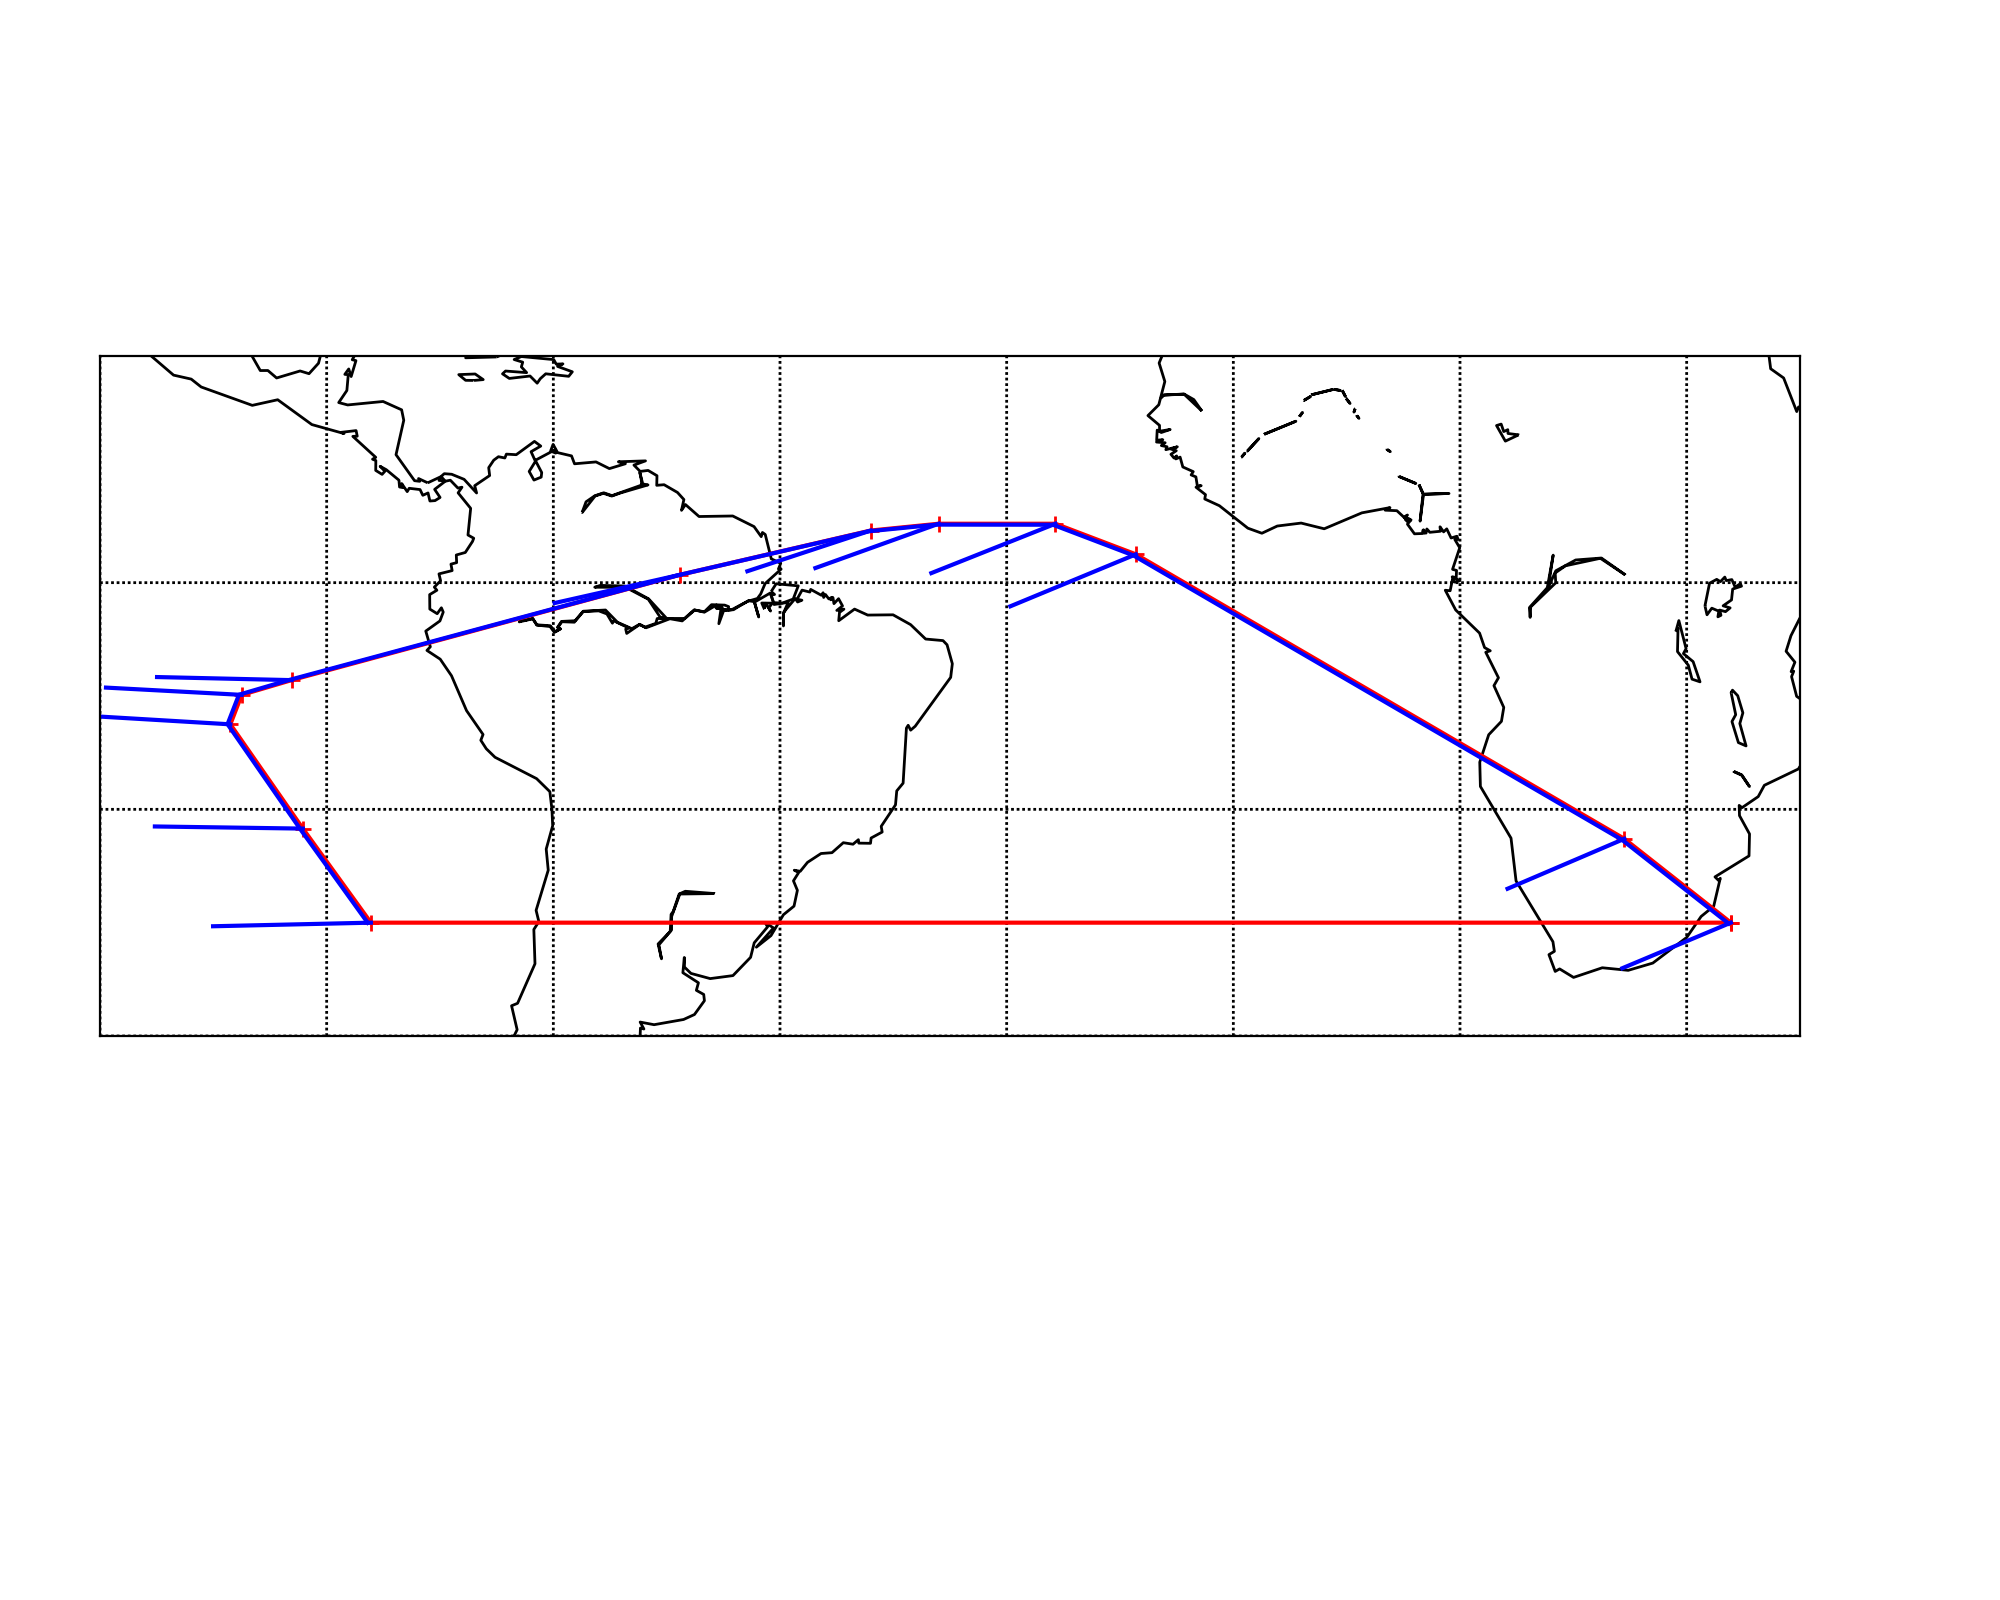

/Users/rac/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/rac/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [12]:
plt.rc('figure', figsize = [10, 8])
plt.rc('font', size = 12)
plt.subplots_adjust(left=0.05, bottom=0.25)
m = Basemap(projection='cyl',llcrnrlat=-40,urcrnrlat=20,llcrnrlon=-110,urcrnrlon=40)
m.drawcoastlines()
m.drawparallels(np.arange(-40.,20.,20.))
m.drawmeridians(np.arange(-110.,40.,20.))
m.plot(saallon,saallat, 'r-+')
m.plot(h1lon,h1lat, 'b-')
#m.plot(h2lon,h2lat, 'g-')
scale = 50
for i in range(0,12):
    x0 = saallon[i]
    y0 = saallat[i]
    dlat = (h1lat[i] - y0)*scale
    dlon = (h1lon[i] - x0)*scale
    x = [x0,x0+dlon]
    y = [y0,y0+dlat]
    m.plot(x,y,'b-')
plt.show()
mpld3.enable_notebook()